In [1]:
import os
import numpy as np
import glob
import h5py
from itertools import product
import matplotlib.pyplot as plt

In [2]:
data_path = "c:/Users/capri28/Documents/ig2/igibson/data/demo/0"
vis = [f"{i}_{j}" for i in ["cataract", "amd", "glaucoma", "presbyopia", "myopia"] for j in [1, 2, 3]] + ["normal_1"]
tasks = ["catch", "navigate", "place", "slice", "throw", "wipe"]

### Completion time and success rate

In [35]:
npy_data = {}
for vi in vis:
    for task in ["catch", "throw", "place", "slice"]:
        npy_data[f"{task}_{vi}_success"] = np.array([])
        npy_data[f"{task}_{vi}_time"] = np.array([])
        for path in glob.glob(rf"{data_path}/{task}/{vi}/*"):
            npy_data[f"{task}_{vi}_success"] = np.append(npy_data[f"{task}_{vi}_success"], np.load(f"{path}/success_list.npy"))
            npy_data[f"{task}_{vi}_time"] = np.append(npy_data[f"{task}_{vi}_time"], np.load(f"{path}//completion_time.npy"))

In [24]:
npy_data

{'catch_cataract_1_success': array([0.9]),
 'catch_cataract_1_time': array([44.48170328]),
 'throw_cataract_1_success': array([1., 0., 1., 0., 1., 1., 1., 0., 1.]),
 'throw_cataract_1_time': array([2.86224413, 1.45589113, 2.56569576, 2.8499558 , 2.71297407,
        2.54018903, 2.34812117, 2.38913226, 2.29129243]),
 'catch_cataract_2_success': array([0.8]),
 'catch_cataract_2_time': array([44.45626664]),
 'throw_cataract_2_success': array([1., 1., 1., 1., 0., 1., 1., 1., 1.]),
 'throw_cataract_2_time': array([3.08465171, 2.30942273, 2.42532396, 2.29188967, 2.97951484,
        2.6223321 , 2.34523869, 2.52288413, 2.53483772]),
 'catch_cataract_3_success': array([0.7]),
 'catch_cataract_3_time': array([44.50121546]),
 'throw_cataract_3_success': array([0., 1., 0., 1., 1., 1., 0., 0., 1.]),
 'throw_cataract_3_time': array([3.4069705 , 2.9890666 , 2.64239836, 2.55953217, 2.36622834,
        2.4319222 , 2.6399653 , 2.69406343, 2.53125072]),
 'catch_amd_1_success': array([0.6]),
 'catch_amd_1_

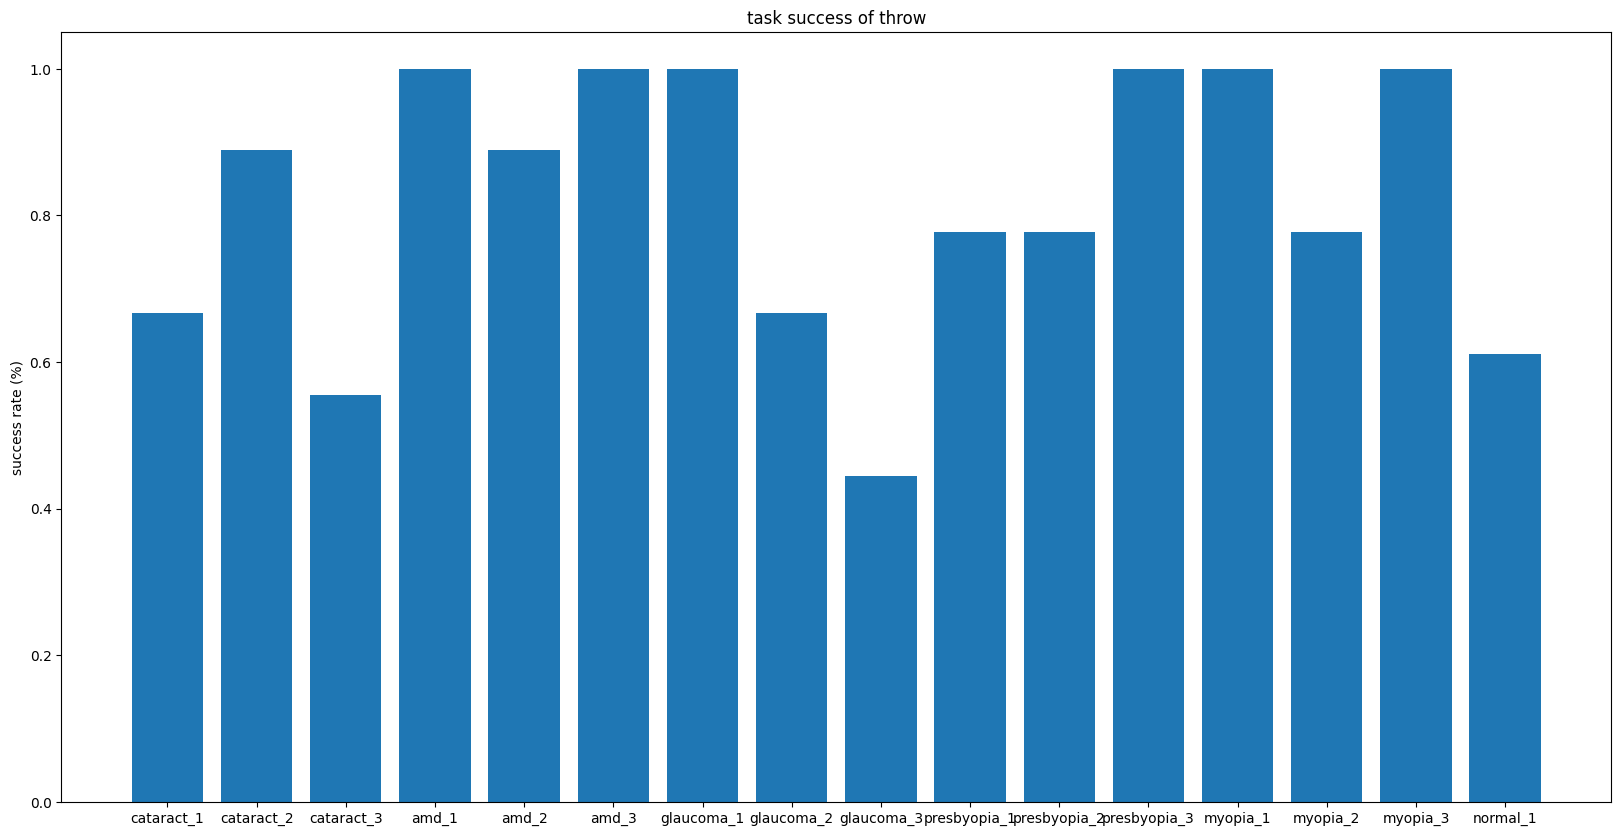

In [36]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.bar(range(len(vis)), [np.mean(npy_data[f"throw_{vi}_success"]) for vi in vis], tick_label=vis)
plt.title(f"task success of throw")
plt.ylabel("success rate (%)")
plt.show()

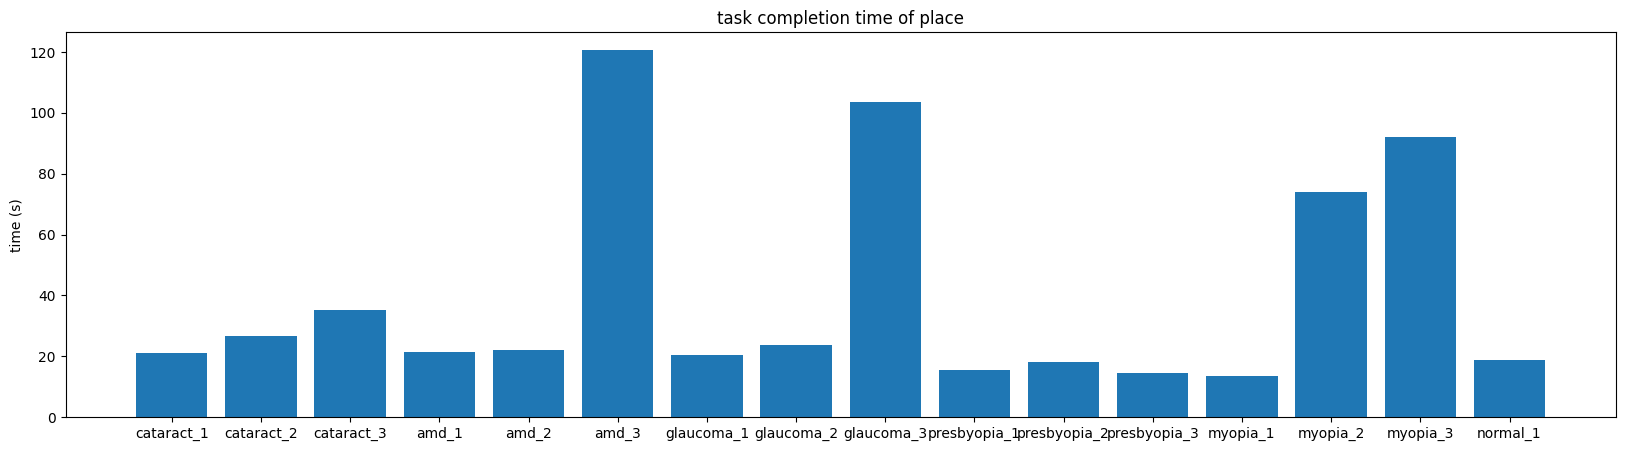

In [37]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.bar(range(len(vis)), [np.mean(npy_data[f"place_{vi}_time"]) for vi in vis], tick_label=vis)
plt.title(f"task completion time of place")
plt.ylabel("time (s)")
plt.show()

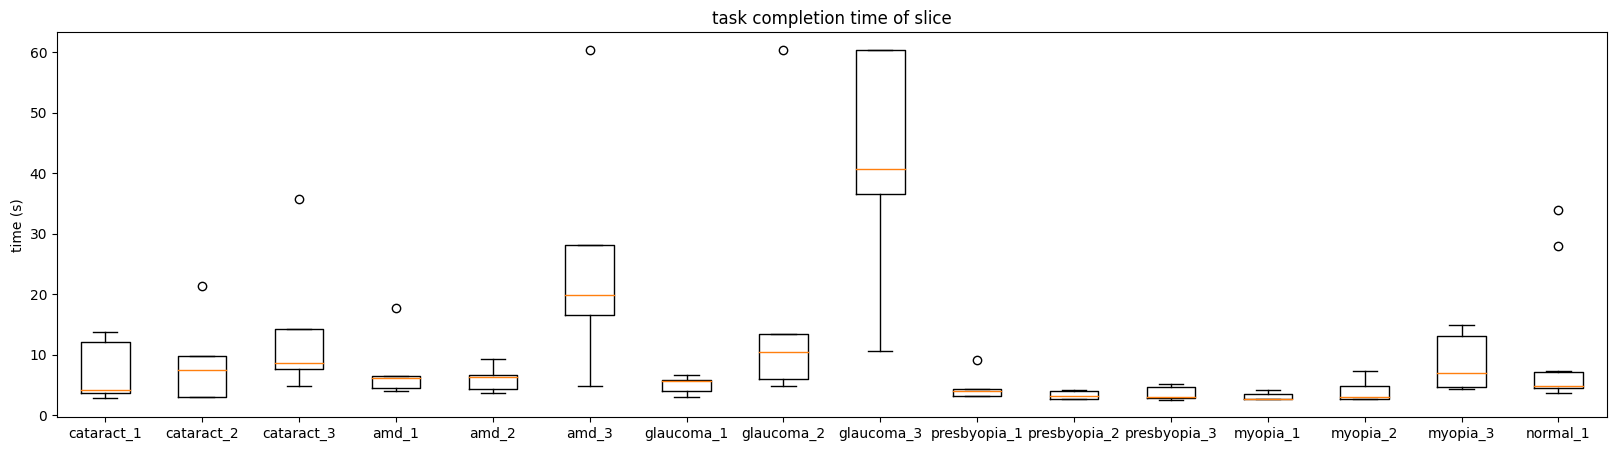

In [33]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.boxplot([npy_data[f"slice_{vi}_time"] for vi in vis], labels=vis)
plt.rcParams['figure.figsize'] = [20, 10]
plt.title(f"task completion time of slice")
plt.ylabel("time (s)")
plt.show()

### HDF5 Device data

In [3]:
hfs = {}
for task in tasks:
    for vi in vis:
        for i, path in enumerate(glob.glob(rf"{data_path}/{task}/{vi}/*/*.hdf5")):
            hfs[f"{task}_{vi}_{i}"] = h5py.File(path)

In [4]:
hfs

{'catch_normal_1_0': <HDF5 file "0.hdf5" (mode r)>,
 'wipe_normal_1_0': <HDF5 file "1.hdf5" (mode r)>,
 'wipe_normal_1_1': <HDF5 file "0.hdf5" (mode r)>}

In [7]:
hfs["catch_normal_1_0"].attrs["/task_specific/frame_sep_list"]


numpy.ndarray

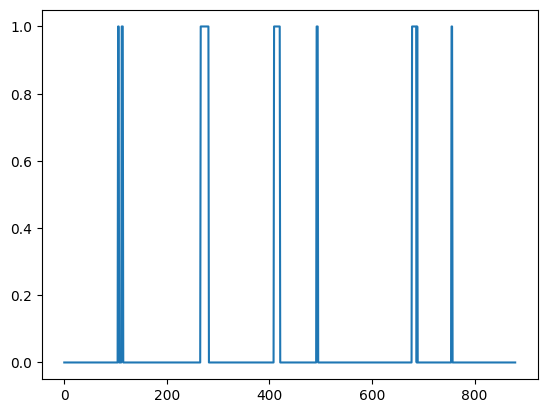

In [22]:
c = np.array(hfs["place_normal_1_0"]["vr"]["vr_event_data"]["collisions"])
plt.plot(c[:, 2])

In [52]:
hmd_pos, irre_move = {}, {}
for hf in hfs:
    hmd_pos[hf] = np.array(hfs[hf]["vr"]["vr_device_data"]["hmd"])
    irre_move[hf] = np.array(hfs[hf]["total_movement_of_irrelavant_objs"])


In [54]:
irre_move["wipe_normal_1_0"]

array([[0.        ],
       [0.01073454],
       [0.0202531 ],
       [0.02855663],
       [0.03626676],
       [0.04449563],
       [0.05343666],
       [0.05843158],
       [0.05907038],
       [0.05952814],
       [0.05985593],
       [0.06009079],
       [0.06025919],
       [0.06037923],
       [0.06046518],
       [0.06052646],
       [0.06057014],
       [0.06060187],
       [0.06062456],
       [0.0606409 ],
       [0.06065289],
       [0.06066173],
       [0.06066774],
       [0.06067207],
       [0.0606752 ],
       [0.06067763],
       [0.06067928],
       [0.06068079],
       [0.06068166],
       [0.06068239],
       [0.06068301],
       [0.06068339],
       [0.06068366],
       [0.06068409],
       [0.06068432],
       [0.06068464],
       [0.0606847 ],
       [0.06068507],
       [0.06068532],
       [0.06068554],
       [0.06068579],
       [0.06068594],
       [0.06068611],
       [0.06068631],
       [0.06068652],
       [0.06068685],
       [0.06068706],
       [0.060

In [56]:
hmd_dist = {}
for vi in vis:
    hmd_dist[vi] = []
    for j in range(5):
        cond = f"wipe_{vi}_{j}"
        if cond in hmd_pos:
            hmd_dist[vi].append(np.sum(np.linalg.norm(hmd_pos[cond][:, 4:7][1:] - hmd_pos[cond][:, 4:7][:-1], axis=1)))

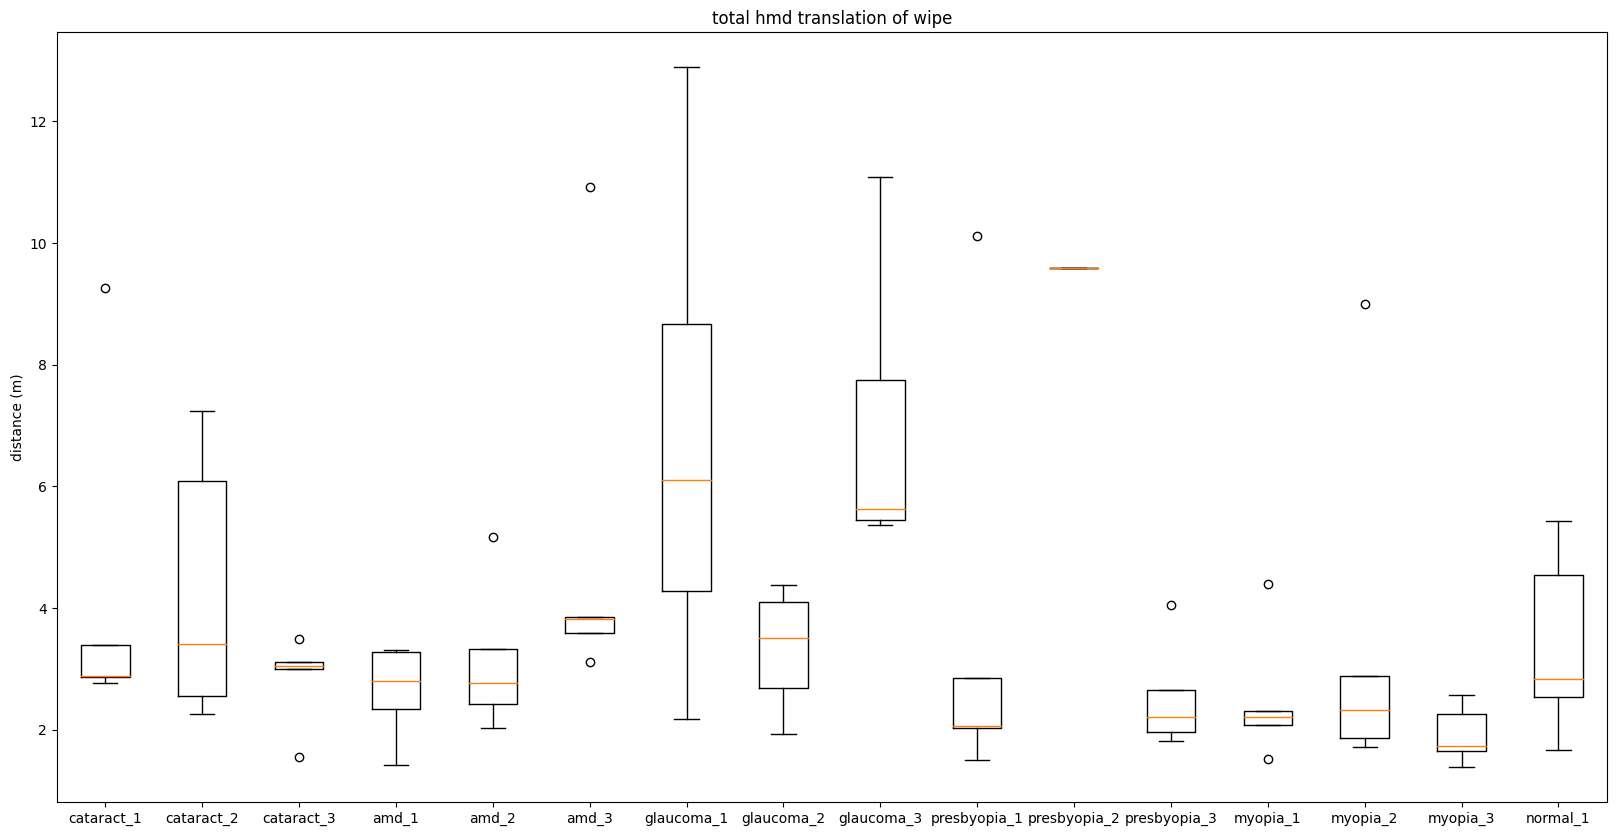

In [57]:
plt.boxplot([hmd_dist[vi] for vi in vis], labels=vis)
plt.title(f"total hmd translation of wipe")
plt.ylabel("distance (m)")
plt.show()

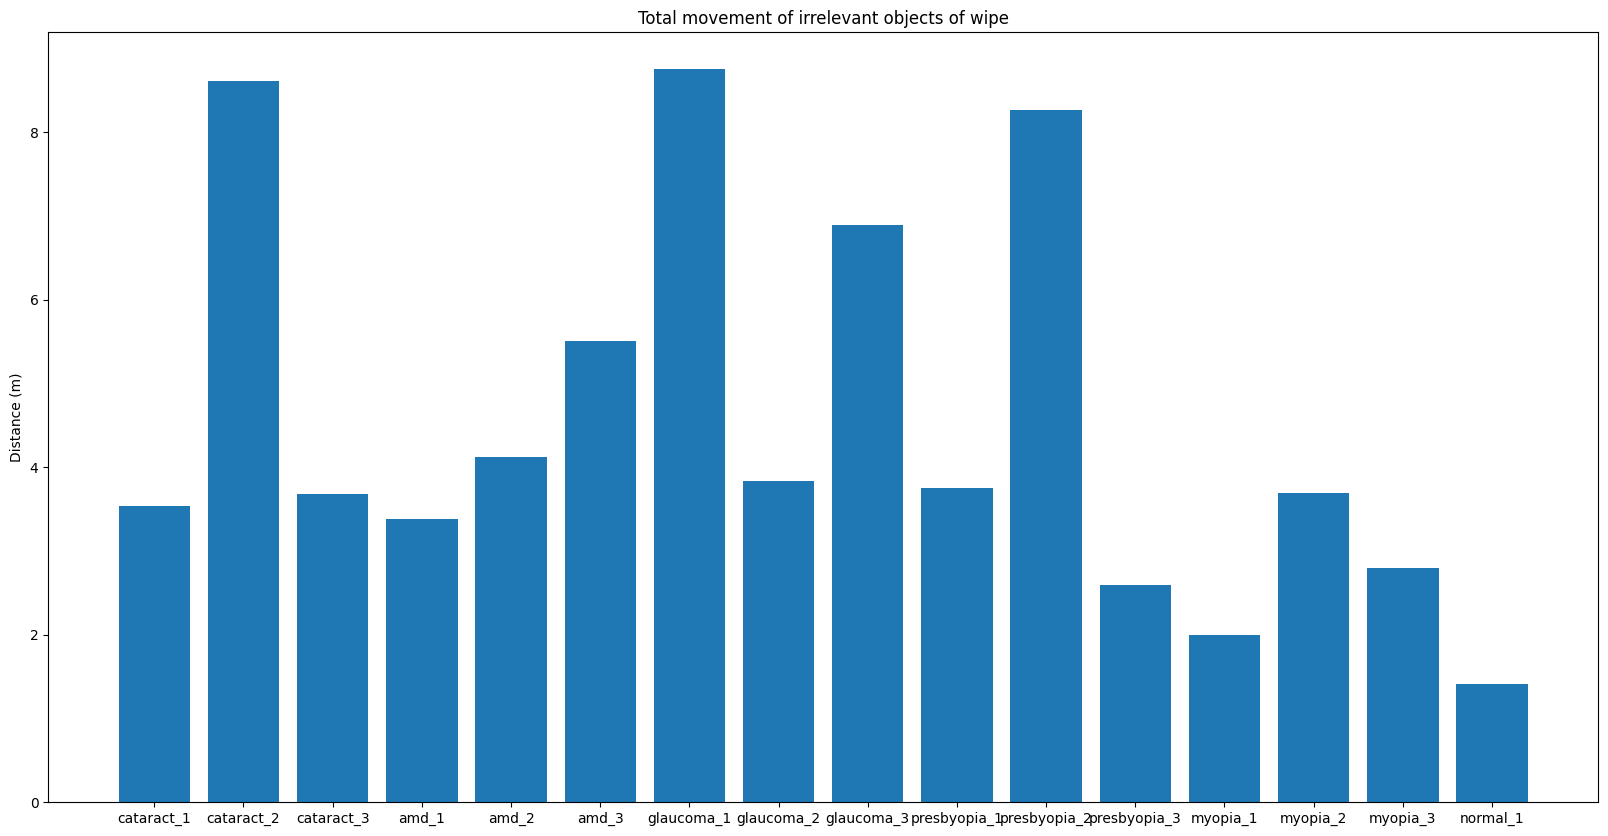

In [64]:
irre_data = {}
for vi in vis:
    irre_data[vi] = []
    for j in range(10):
        cond_trial = f"wipe_{vi}_{j}"
        if cond_trial in irre_move:
            irre_data[vi].append(irre_move[cond_trial][-1])
plt.bar(range(len(vis)), [np.mean(irre_data[vi]) for vi in vis], tick_label=vis)
plt.title(f"Total movement of irrelevant objects of wipe")
plt.ylabel("Distance (m)")
plt.show()

Text(0.5, 1.0, 'right controller trigger')

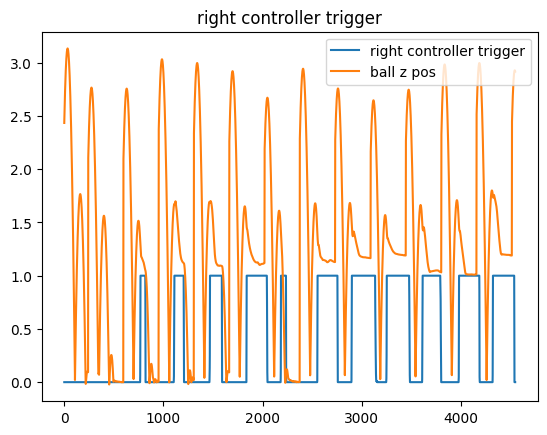

In [ ]:
plt.plot(hf["vr"]["vr_button_data"]["right_controller"][:, 0], label="right controller trigger")
plt.plot(hf["physics_data"]["1"]["position"][:, 2], label="ball z pos")
plt.legend()
plt.title("right controller trigger")

In [45]:
right_eye_openess_data = {}
for hf in hfs:
    right_eye_openess_data[hf] = np.array(hfs[hf]["vr"]["vr_eye_tracking_data"][:, -1])
    right_eye_openess_data[hf] = right_eye_openess_data[hf][right_eye_openess_data[hf] > 0]
plt.plot(right_eye_openess_data["navigate_normal_1_0"], label="normal")
plt.plot(right_eye_openess_data["navigate_amd_3_4"], label="amd")
plt.plot(right_eye_openess_data["navigate_glaucoma_3_0"], label="glaucoma")
plt.legend()
plt.title("eye openness for navigate")
plt.show()

KeyError: 'navigate_normal_1_0'

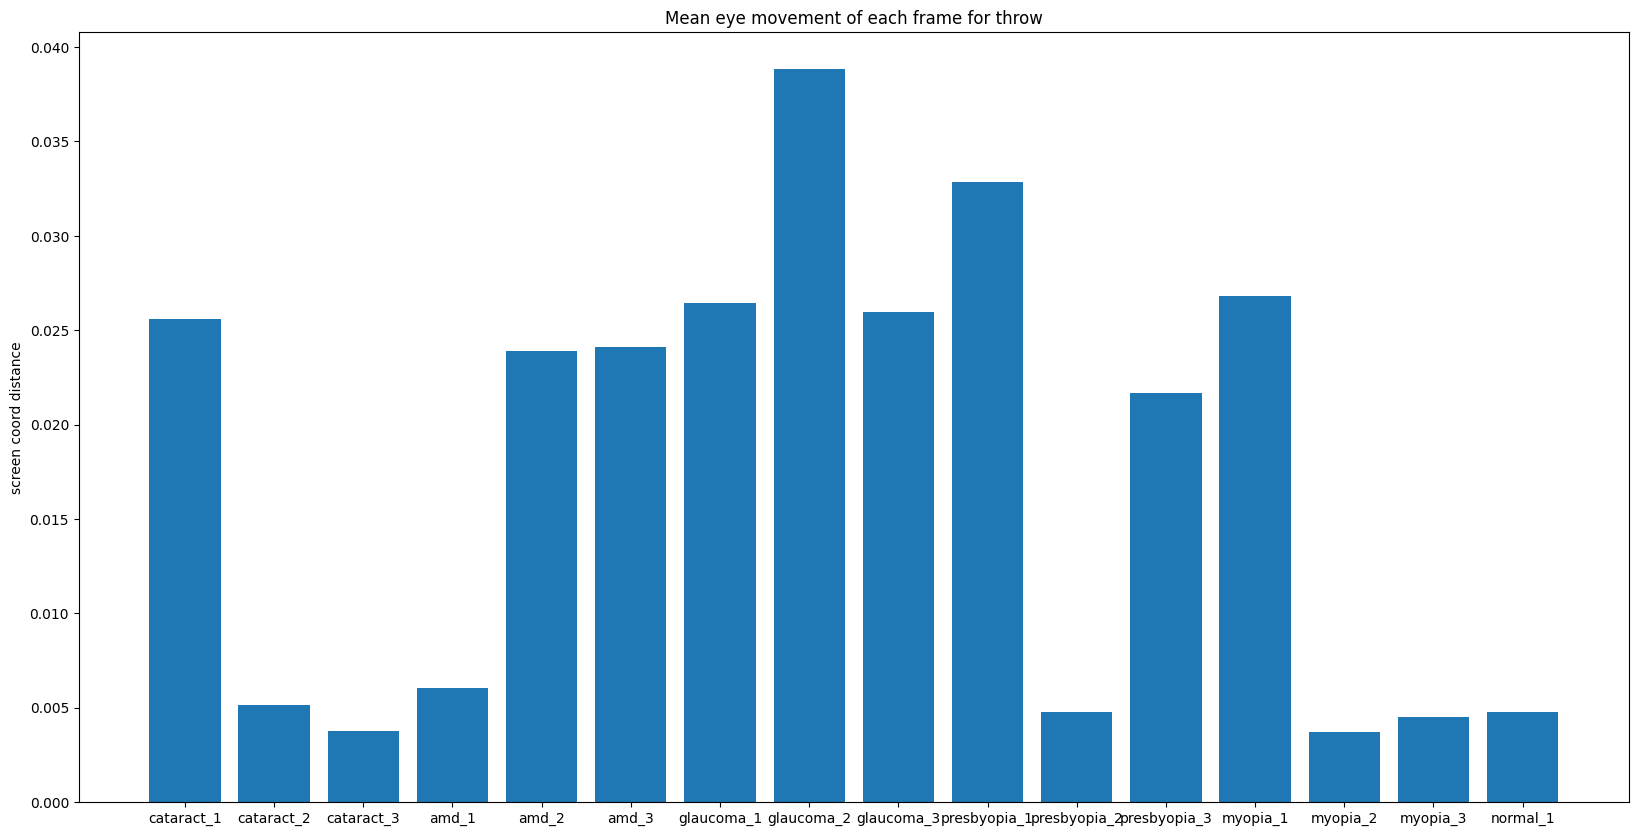

In [71]:
eye_screen_pos_data = {}
for vi in vis:
    key = f"throw_{vi}"
    eye_screen_pos_data[key] = {}
    for i in range(1):
        eye_screen_pos_data[key][i] = np.array(hfs[f"{key}_{i}"]["vr"]["vr_eye_tracking_data"][:, 7:9])
    # right_eye_screen_pos_data[hf] = right_eye_screen_pos_data[hf][right_eye_screen_pos_data[hf]]
        eye_screen_pos_data[key][i] = np.mean(np.linalg.norm(eye_screen_pos_data[key][i][1:] - eye_screen_pos_data[key][i][:-1], axis=1))

plt.bar(range(len(vis)), [np.mean([eye_screen_pos_data[key][i] for i in range(1)]) for key in eye_screen_pos_data], tick_label=vis)
plt.title("Mean eye movement of each frame for throw")
plt.ylabel("screen coord distance")
plt.show()

### Task irrelevant object

In [8]:
hf = h5py.File(glob.glob(rf"{data_path}/navigate/normal_1/*/{0}.hdf5")[0])

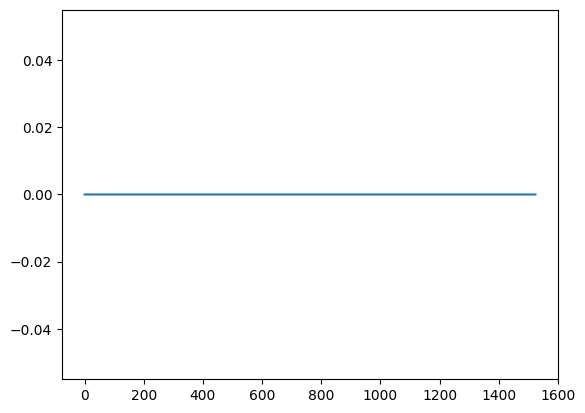

In [9]:
x = []
for i in hf["total_movement_of_irrelavant_objs"]:
    x.append(i[0])
plt.plot(x)

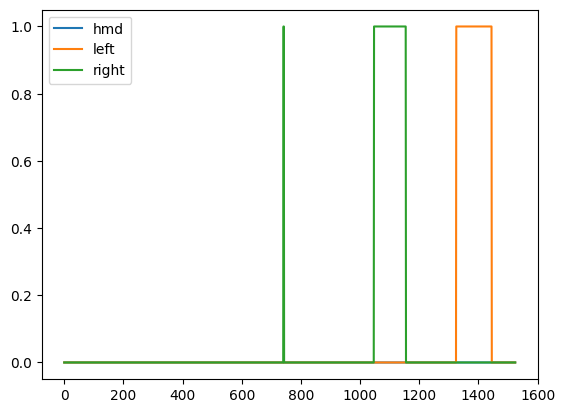

In [10]:
x, y, z = [], [], []
for i in hf["vr"]["vr_event_data"]["collisions"]:
    x.append(i[0])
    y.append(i[1])
    z.append(i[2])
plt.plot(x, label="hmd")
plt.plot(y, label="left")
plt.plot(z, label="right")
plt.legend()
plt.show()

In [ ]:
hf.close()

In [20]:
for h in hfs.values():
       if h.__bool__():
              h.close()